### This script contains the following:

#### 1. Importing libraries 
#### 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing
#### 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

#### 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart
###### 4.1 Explain why you chose that number in a markdown cell

#### 5. Run the k-means algorithm.
#### 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.
#### 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.
#### 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
#### 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.
#### 10. Propose what these results could be useful for in future steps of an analytics pipeline.
#### 11. Save data

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn

# import the k-means algorithm from scikit-learn
from sklearn.cluster import KMeans

# convenience module that bulk imports matplotlib
import pylab as pl

In [2]:
# This option ensures that the graphs created show up below designated code
%matplotlib inline

### 2. Importing Data

In [3]:
# make path variable
path = r'C:\Users\justi\Downloads\2024AirbnbAmsterdam'

In [4]:
# import Amsterdam listings dataset, ensure "index_col=0" removes the "Unnamed:0 index column", and address memory usage concerns with "low_memory= False"
df = pd.read_csv(os.path.join(path, 'listings_checked2.csv'), index_col = 0, low_memory= False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20024 entries, 2818 to 30580413
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   caption                 19986 non-null  object 
 1   host_id                 20024 non-null  int64  
 2   host_is_superhost       20024 non-null  int64  
 3   host_listings_count     20024 non-null  int64  
 4   neighbourhood_cleansed  20024 non-null  object 
 5   latitude                20024 non-null  float64
 6   longitude               20024 non-null  float64
 7   property_type           20024 non-null  object 
 8   room_type               20024 non-null  object 
 9   accommodates            20024 non-null  int64  
 10  bathrooms               20024 non-null  float64
 11  bedrooms                20024 non-null  int64  
 12  amenities               20024 non-null  object 
 13  price                   20024 non-null  int64  
 14  guests_included         20024 non-nul

In [6]:
# delete non-numeric columns
df_clustering = df.drop(columns=['caption', 'neighbourhood_cleansed', 'property_type', 'room_type', 'amenities', 'cancellation_policy', 'first_review', 'last_review', 'is_apartment', 'color'])

In [7]:
# change datatype from float to int
cols_to_convert = ['latitude', 'longitude', 'bathrooms']
df_clustering[cols_to_convert] = df[cols_to_convert].fillna(0).astype(int)

In [8]:
df_clustering.head()

,host_id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable
id,,,,,,,,,,,,,,,,
2818,3159,1,1,52,4,2,1,1,59,1,20,3,15,248,97,1
3209,3806,0,1,52,4,5,1,2,160,2,15,4,20,42,96,0
20168,59484,0,2,52,4,2,1,1,80,2,0,1,1000,233,87,0
25428,56142,0,2,52,4,3,1,1,125,2,10,14,60,1,100,0
27886,97647,1,1,52,4,2,1,1,150,1,0,2,730,171,99,1


In [9]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20024 entries, 2818 to 30580413
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   host_id               20024 non-null  int64
 1   host_is_superhost     20024 non-null  int64
 2   host_listings_count   20024 non-null  int64
 3   latitude              20024 non-null  int32
 4   longitude             20024 non-null  int32
 5   accommodates          20024 non-null  int64
 6   bathrooms             20024 non-null  int32
 7   bedrooms              20024 non-null  int64
 8   price                 20024 non-null  int64
 9   guests_included       20024 non-null  int64
 10  extra_people          20024 non-null  int64
 11  minimum_nights        20024 non-null  int64
 12  maximum_nights        20024 non-null  int64
 13  number_of_reviews     20024 non-null  int64
 14  review_scores_rating  20024 non-null  int64
 15  instant_bookable      20024 non-null  int64
dtypes: 

### 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [10]:
# define the range of potential clusters in the data.
num_cl = range(1, 10)

# define k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [11]:
# create ten possible sets of clusters: one with one cluster, one with two clusters, all the way up to one with ten clusters, then work out a rate of variation for each cluster
score = [kmeans[i].fit(df_clustering).score(df_clustering) for i in range(len(kmeans))] 

score

C:\Users\justi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\justi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\justi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\justi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\justi\anaconda3\Lib\site-packages\sklearn\clust

[-6.391276549944358e+19,
 -1.526726641402114e+19,
 -6.681278136510403e+18,
 -3.5884085743849887e+18,
 -2.1931984696543288e+18,
 -1.6128475261532961e+18,
 -1.1748053071481825e+18,
 -9.007416798290863e+17,
 -7.138243735595753e+17]

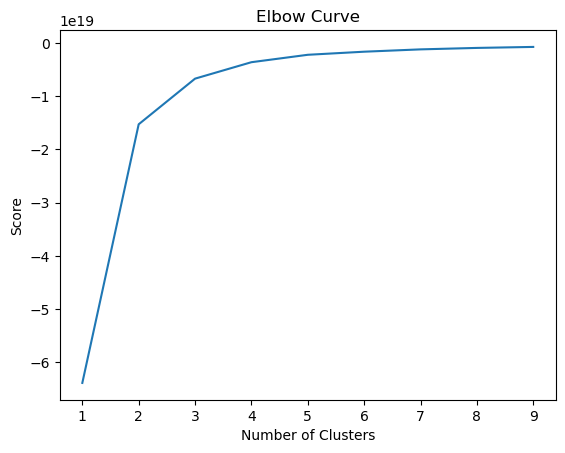

In [12]:
# Plot the elbow curve using PyLab

elbow_curve = pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

#### The elbow curve increases from 1-2-3-4 and then begins to flatten out after 4. Therefore, 4 is optimal number of clusters to use in k-means algorithm.

### 5. Run the k-means algorithm.

In [14]:
# create k-means object
kmeans = KMeans(n_clusters = 4)

In [15]:
# fit k-means object to 'df_clustering'
kmeans.fit(df_clustering)

C:\Users\justi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

### 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [16]:
df_clustering

,host_id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable
id,,,,,,,,,,,,,,,,
2818,3159,1,1,52,4,2,1,1,59,1,20,3,15,248,97,1
3209,3806,0,1,52,4,5,1,2,160,2,15,4,20,42,96,0
20168,59484,0,2,52,4,2,1,1,80,2,0,1,1000,233,87,0
25428,56142,0,2,52,4,3,1,1,125,2,10,14,60,1,100,0
27886,97647,1,1,52,4,2,1,1,150,1,0,2,730,171,99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30576148,13399651,0,1,52,4,4,2,3,340,1,0,7,12,0,0,0
30577727,1595885,0,2,52,4,3,1,2,150,1,0,3,14,0,0,0
30578037,87866499,0,2,52,4,2,1,1,80,1,0,10,22,0,0,0


In [17]:
df_clustering['clusters'] = kmeans.fit_predict(df_clustering)

C:\Users\justi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
# validate 'clusters' column show on far right of dataframe
df_clustering.head()

,host_id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,clusters
id,,,,,,,,,,,,,,,,,
2818,3159,1,1,52,4,2,1,1,59,1,20,3,15,248,97,1,1
3209,3806,0,1,52,4,5,1,2,160,2,15,4,20,42,96,0,1
20168,59484,0,2,52,4,2,1,1,80,2,0,1,1000,233,87,0,1
25428,56142,0,2,52,4,3,1,1,125,2,10,14,60,1,100,0,1
27886,97647,1,1,52,4,2,1,1,150,1,0,2,730,171,99,1,1


In [19]:
# frequency count of 'clusters' column
df_clustering['clusters'].value_counts()

clusters
1    12119
2     4381
3     2197
0     1327
Name: count, dtype: int64

### 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

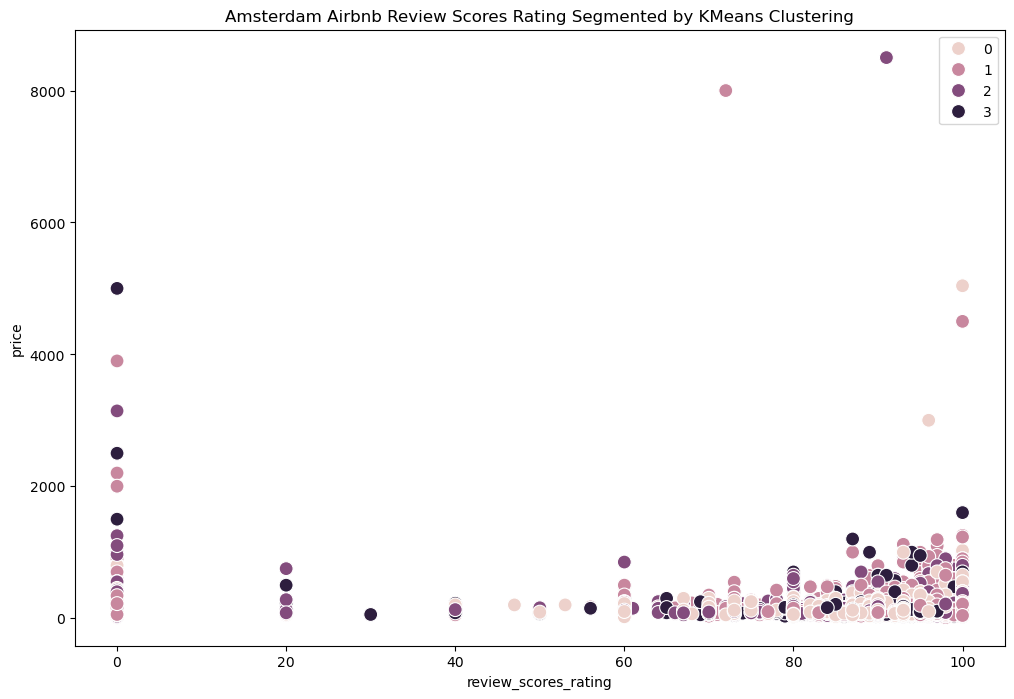

In [22]:
plt.figure(figsize=(12,8))
cluster_scatterplot = sns.scatterplot(x=df_clustering['review_scores_rating'], y=df_clustering['price'], hue=kmeans.labels_, s=100) 

plt.title('Amsterdam Airbnb Review Scores Rating Segmented by KMeans Clustering')
plt.xlabel('review_scores_rating')
plt.ylabel('price')
plt.show()

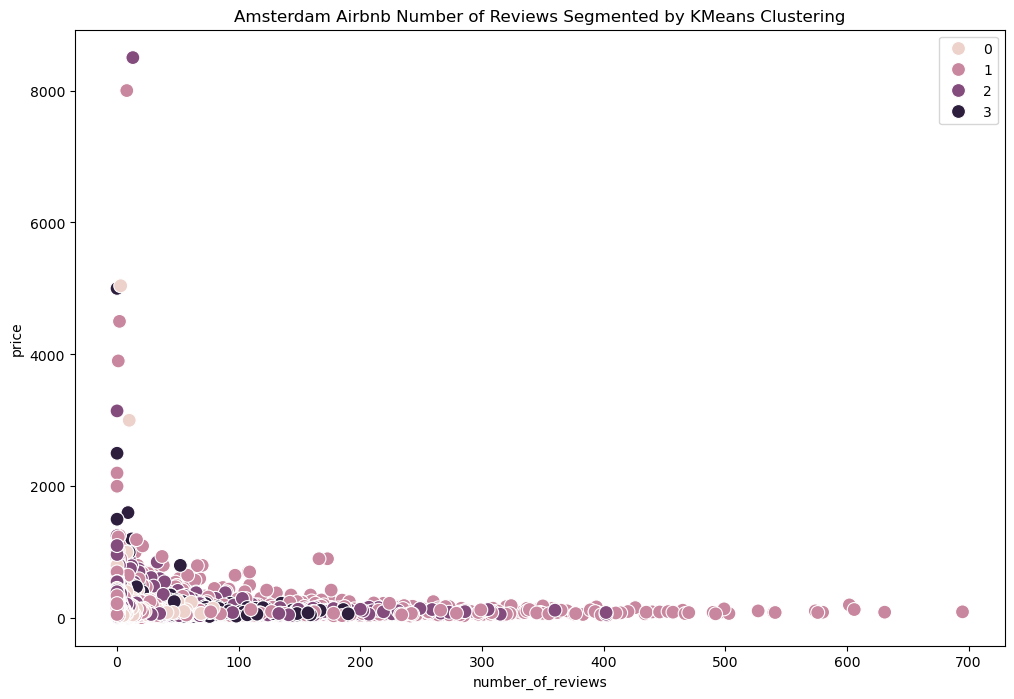

In [23]:
plt.figure(figsize=(12,8))
cluster_scatterplot = sns.scatterplot(x=df_clustering['number_of_reviews'], y=df_clustering['price'], hue=kmeans.labels_, s=100) 

plt.title('Amsterdam Airbnb Number of Reviews Segmented by KMeans Clustering')
plt.xlabel('number_of_reviews')
plt.ylabel('price')
plt.show()

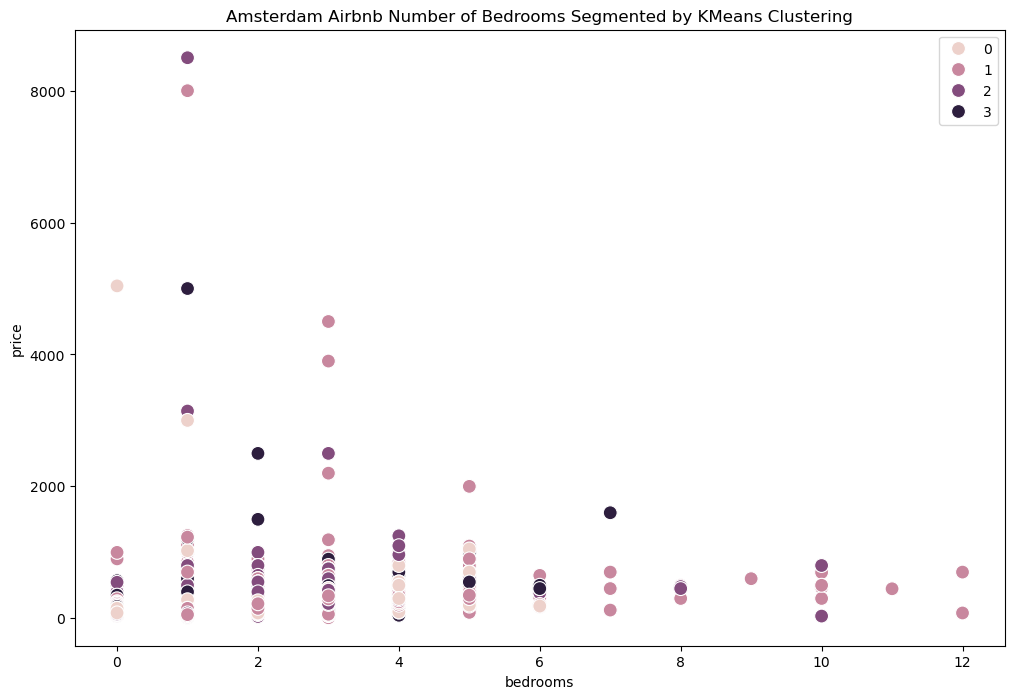

In [21]:
plt.figure(figsize=(12,8))
cluster_scatterplot = sns.scatterplot(x=df_clustering['bedrooms'], y=df_clustering['price'], hue=kmeans.labels_, s=100) 

plt.title('Amsterdam Airbnb Number of Bedrooms Segmented by KMeans Clustering')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

### 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

#### Scatterplot 1: "Reviews_scores_ratings" x "Price"

##### I thought places with Airbnb listings with higher rating (ex: 80-100 range) would charge higher prices, but instead the dots are showing prices are all over the place. Some places with low ratings are charging really high prices. The different color groups (suppose to show me a pattern or "clusters") does not tell me a clear story. Therefore, it is hard for me to find a connection between place rating and its price.

##### This is useful insight because listing's rating does not influence set price. A listing with a review score of 60 might charge the same price similar to a listing review score of 90. This suggest to me that price is being affected by other factors besides guest satisfaction.

##### I have to explore the data further. Other factors would need to be calculated or attributed to possibly derive a better insight of why prices vary so much: 

##### 1. Approximate # miles from epicenter Dam Square
##### 2. What time of year it's being booked (frequency chart using "first review" and "last review" dates
##### 3. Dissecting the object form data of "amenities" and quantify how many "amenities" does the listing offer

#### Scatterplot 2: "Number_of_reviews" x "Price"

##### I thought places with Airbnb listings that had many more reviews than its competitors would cost more, but that is not the case. Most places with many reviews are priced pretty low; there are only a few expensive ones that stand out. There is no clear pattern connecting the "number of reviews" to the "price". The different color groups (suppose to show me a pattern or "clusters") does not tell me a clear story. Therefore, it is hard for me to find a connection to explain why some places are more expensive than others.

##### This is useful insight because listing's number of reviews will not automatically tell me it will be more expensive. I would have to explore the data further to understand the quality vs. quantity of reviews. 

#### Scatterplot 3: "Bedrooms" x "Price"

##### I thought number of beds attribute would clearly show me better visual of segmented groups. However, I unexpectedly see some places with 0-2 bedrooms are just expensive as those with 6-12 bedrooms. The clusters are mixed together and there is no clear pattern showing that price increases as the number of beds increase of listing.

##### This is useful insight because listing's bedroom attribute does not automatically tell me it will be more expensive. I could need to look into object form data "property_type" more and assign a numeric label of each (ex: Apartment=1, Townhome=2, etc) and see if that makes the clustering better.

### 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [39]:
# Create a subset dataframe with the specified columns
subset_df = df_clustering[['number_of_reviews', 'review_scores_rating', 'bedrooms', 'price', 'clusters']]

In [40]:
# Group by the 'clusters' column
grouped = subset_df.groupby('clusters')

In [41]:
# Calculate descriptive statistics for each cluster
cluster_stats = grouped.describe()

In [42]:
# Calculate specific statistics (mean, std, median, min, max) for each cluster
cluster_stats = grouped.agg(['mean', 'std', 'median', 'min', 'max'])
cluster_stats

number_of_reviews                            review_scores_rating  \
                      mean        std median min  max                 mean   
clusters                                                                     
0                 6.464959  10.182428    3.0   0   79            67.562924   
1                25.906675  50.448927   10.0   0  695            85.350854   
2                17.642547  32.821011    7.0   0  402            79.739785   
3                14.521620  21.745090    7.0   0  190            80.013655   

                                     bedrooms                           \
                std median min  max      mean       std median min max   
clusters                                                                 
0         42.652269   93.0   0  100  1.346647  0.852882    1.0   0   6   
1         29.740713   96.0   0  100  1.471161  0.897065    1.0   0  12   
2         34.787067   95.0   0  100  1.418398  0.874823    1.0   0  10   
3         33.712729   94.0   0  100  1.408739  0.859150    1.0   0   7   

               price                               
                mean         std median min   max  
clusters                                           
0         161.469480  181.396935  135.0  20  5040  
1         151.030778  128.018721  125.0   8  8000  
2         152.188998  173.134074  120.0  23  8500  
3         153.137005  154.208863  129.0  23  5000

#### Key Findings among the 4 clusters:

##### Price distribution varies so much among all groups from $8 minimum to $8500 maximum. This shows me price is not strongly linked to how many reviews a listing has, its review score, nor number of bedrooms. 

##### Review scores in Cluster 0 has an average review score= ~68. This could indicate these could be newer listings or not high quality listings vs Cluster 1,2,3. Review scores in Cluster 1-3 are higher between 79-85 on average. 

##### Number of Reviews: Cluster 1 has the highest average of number of reviews (~26) vs. Cluster 0 is only 6. This can mean Cluster 1 listings are more popular or more established than Cluster 0 listings.

##### Bedrooms quantity is rather consistent across all clusters. Most listings are between 1-2 bedrooms. Number of bedrooms does not seem like a key factor in affecting how listings are grouped.

### 10. Propose what these results could be useful for in future steps of an analytics pipeline.

##### 1. Approximate each listings' # miles from epicenter Dam Square and create a new column called 'Distance from epicenter (m)'
##### 2. Review What time of year are Amsterdam bookings more popular in booking (frequency chart using "first review" and "last review" dates and segment each 4 months by season of 'Spring', 'Summer', 'Fall', 'Winter'
##### 3. Dissecting the object form data of "amenities" and quantify how many "amenities" does the listing offer (ex: counting how many 'commas' are in the free-form data) and create a new column called '# Amenities Offered'

### 11. Save data

In [44]:
# Export dataframe:
df_clustering.to_csv(os.path.join(path, 'listings_clustering1.csv'))

In [45]:
subset_df.to_csv(os.path.join(path, 'listings_clustering2.csv'))

In [46]:
cluster_stats.to_csv(os.path.join(path, 'listings_clustering3.csv'))